#### ***Author:- Abhishek Kumar***
#### ***Project:- Flight Price Prediction ML and Feature Engineering***-->

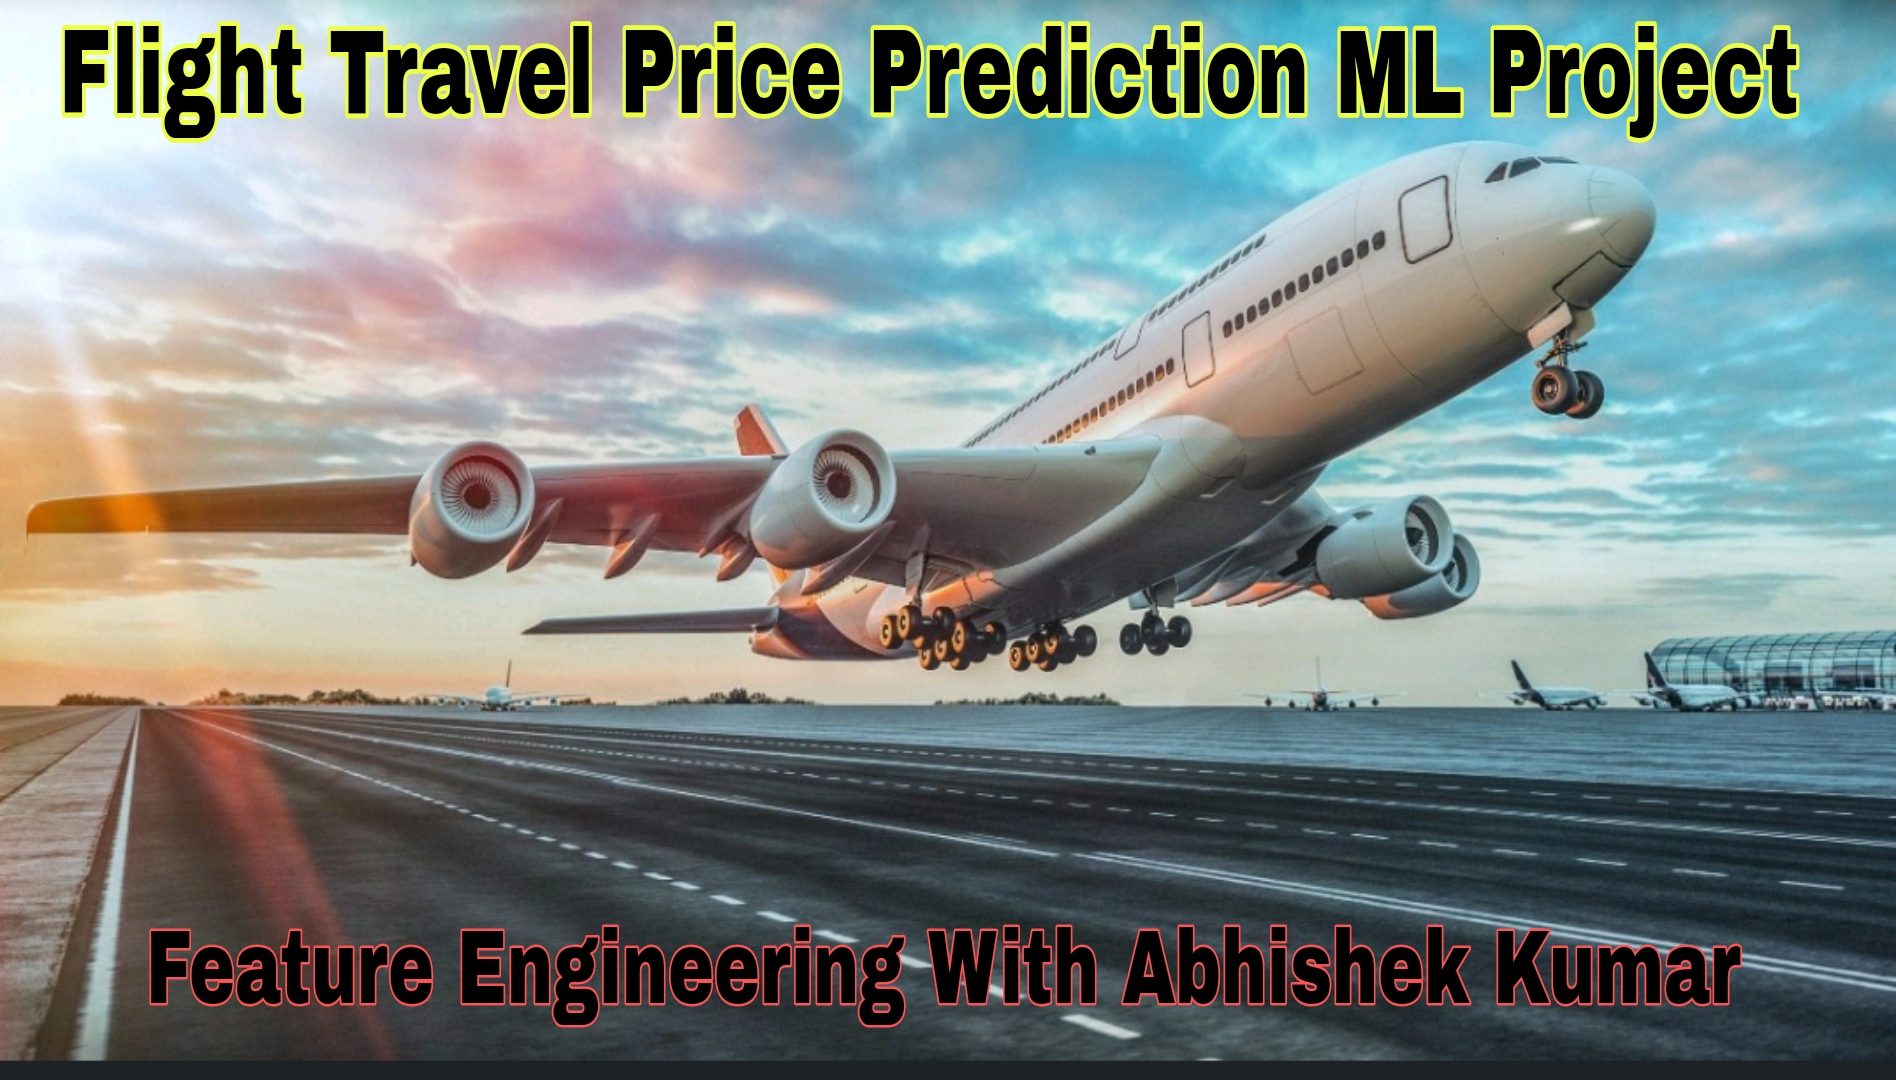

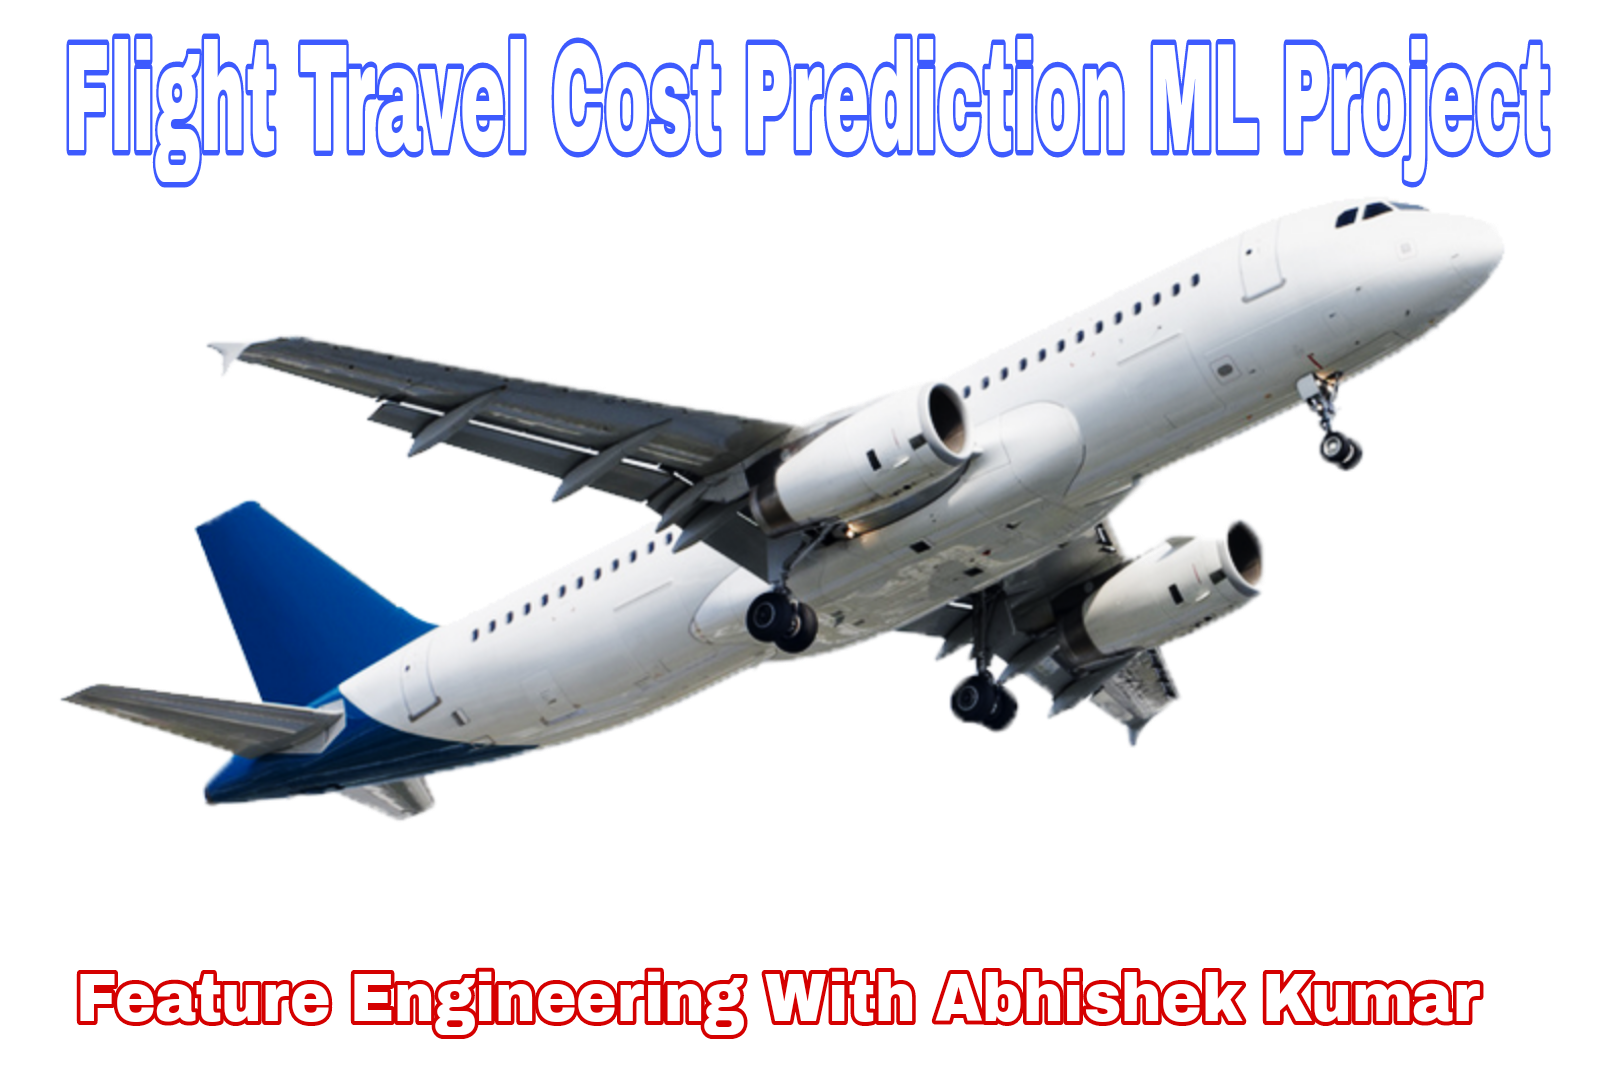

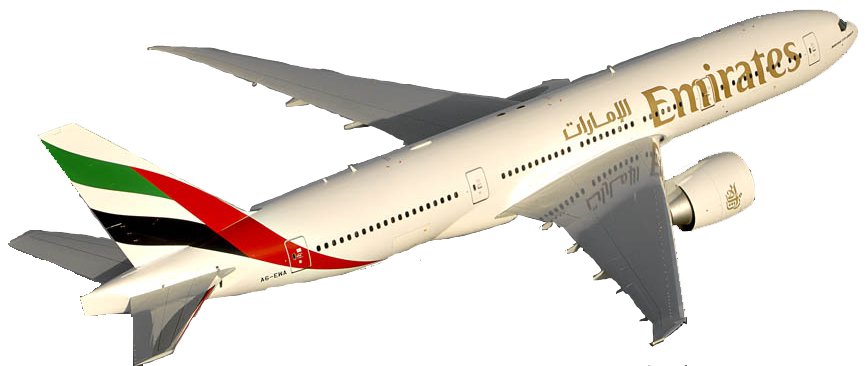

#### ***Step 1:- Import All important Library-->***

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Step 2:- Now Load the XLSX file from the Dataset-->

In [4]:
train_df = pd.read_excel("Data_Train.xlsx")

In [5]:
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


#### Step 3:- Now Again Load the New Test data--->

In [6]:
test_df=pd.read_excel("Test_set.xlsx")

In [7]:
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [8]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [9]:
test_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


In [10]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [11]:
train_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


#### Step 4:- Now We are Merge the both the Train and Test data--->

In [58]:
import pandas as pd

# Assuming df_train and df_test are already defined DataFrames
final_df = pd.concat([train_df, test_df])
final_df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [59]:
final_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [60]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [61]:
final_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [62]:
final_df.describe

<bound method NDFrame.describe of                 Airline Date_of_Journey    Source Destination  \
0                IndiGo      24/03/2019  Banglore   New Delhi   
1             Air India       1/05/2019   Kolkata    Banglore   
2           Jet Airways       9/06/2019     Delhi      Cochin   
3                IndiGo      12/05/2019   Kolkata    Banglore   
4                IndiGo      01/03/2019  Banglore   New Delhi   
...                 ...             ...       ...         ...   
2666          Air India       6/06/2019   Kolkata    Banglore   
2667             IndiGo      27/03/2019   Kolkata    Banglore   
2668        Jet Airways       6/03/2019     Delhi      Cochin   
2669          Air India       6/03/2019     Delhi      Cochin   
2670  Multiple carriers      15/06/2019     Delhi      Cochin   

                      Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                 BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1     CCU → IXR → BBI → BLR    05:5

In [63]:
final_df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [45]:
final_df.size

146894

In [54]:
final_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Additional_Info', 'Price'],
      dtype='object')

In [52]:
final_df.head(10)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,No info,13302.0
5,SpiceJet,24/06/2019,Kolkata,Banglore,09:00,11:25,2h 25m,No info,3873.0
6,Jet Airways,12/03/2019,Banglore,New Delhi,18:55,10:25 13 Mar,15h 30m,In-flight meal not included,11087.0
7,Jet Airways,01/03/2019,Banglore,New Delhi,08:00,05:05 02 Mar,21h 5m,No info,22270.0
8,Jet Airways,12/03/2019,Banglore,New Delhi,08:55,10:25 13 Mar,25h 30m,In-flight meal not included,11087.0
9,Multiple carriers,27/05/2019,Delhi,Cochin,11:25,19:15,7h 50m,No info,8625.0


In [77]:
final_df['Arrival_Time'].str.split(' ').str[0]

0       01:10
1       13:15
2       04:25
3       23:30
4       21:35
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [78]:
final_df['Arrival_Time']=final_df['Arrival_Time'].apply(lambda x : x.split(' ')[0])

In [79]:
final_df['Arrival_hour']=final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_min']=final_df['Arrival_Time'].str.split(':').str[1]

In [80]:
final_df.head(1)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10,2h 50m,0.0,No info,3897.0,01,10


In [81]:
final_df['Arrival_hour']=final_df['Arrival_hour'].astype(int)
final_df['Arrival_min']=final_df['Arrival_min'].astype(int)

In [82]:
final_df.drop('Arrival_Time',axis=1,inplace=True)

In [83]:
final_df.drop('Arrival_hour', axis=1, inplace=True)

In [84]:
final_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,2h 50m,0.0,No info,3897.0,10
1,Air India,1/05/2019,Kolkata,Banglore,05:50,7h 25m,2.0,No info,7662.0,15
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,19h,2.0,No info,13882.0,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,5h 25m,1.0,No info,6218.0,30
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,4h 45m,1.0,No info,13302.0,35


In [85]:
final_df['Dept_hour']=final_df['Dep_Time'].str.split(':').str[0]
final_df['Dept_min']=final_df['Dep_Time'].str.split(':').str[1]
final_df['Dept_hour']=final_df['Dept_hour'].astype(int)
final_df['Dept_min']=final_df['Dept_min'].astype(int)
final_df.drop('Dep_Time',axis=1,inplace=True)

In [86]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  float64
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Arrival_min      13354 non-null  int32  
 9   Dept_hour        13354 non-null  int32  
 10  Dept_min         13354 non-null  int32  
dtypes: float64(2), int32(3), object(6)
memory usage: 1.1+ MB


In [87]:
final_df['Total_Stops'].unique()

array([ 0.,  2.,  1.,  3., nan,  4.])

In [88]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [67]:
final_df[final_df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [68]:
final_df[final_df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [69]:
final_df.drop('Route',axis=1,inplace=True)

In [71]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2.0,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2.0,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1.0,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1.0,No info,13302.0


In [73]:
final_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [75]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  float64
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
dtypes: float64(2), object(8)
memory usage: 1.1+ MB


In [89]:
final_df['duration_hour']=final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [90]:
final_df[final_df['duration_hour']=='5m']

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Arrival_min,Dept_hour,Dept_min,duration_hour
6474,Air India,6/03/2019,Mumbai,Hyderabad,5m,NaN,No info,17327.0,55,16,50,5m
2660,Air India,12/03/2019,Mumbai,Hyderabad,5m,NaN,No info,NaN,55,16,50,5m


In [91]:
final_df.drop(6474,axis=0,inplace=True)
final_df.drop(2660,axis=0,inplace=True)

In [ ]:
final_df['duration_hour']=final_df['duration_hour'].astype('int')

In [92]:
final_df['duration_hour']=final_df['duration_hour'].astype('int')

In [94]:
final_df.drop('Duration', axis=1, inplace=True)

In [96]:
final_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Additional_Info,Price,Arrival_min,Dept_hour,Dept_min,duration_hour
0,IndiGo,24/03/2019,Banglore,New Delhi,NaN,No info,3897.0,10,22,20,2
1,Air India,1/05/2019,Kolkata,Banglore,NaN,No info,7662.0,15,5,50,7
2,Jet Airways,9/06/2019,Delhi,Cochin,NaN,No info,13882.0,25,9,25,19
3,IndiGo,12/05/2019,Kolkata,Banglore,NaN,No info,6218.0,30,18,5,5
4,IndiGo,01/03/2019,Banglore,New Delhi,NaN,No info,13302.0,35,16,50,4


In [98]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [100]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13351 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Date_of_Journey  13351 non-null  object 
 2   Source           13351 non-null  object 
 3   Destination      13351 non-null  object 
 4   Total_Stops      0 non-null      float64
 5   Additional_Info  13351 non-null  object 
 6   Price            10681 non-null  float64
 7   Arrival_min      13351 non-null  int32  
 8   Dept_hour        13351 non-null  int32  
 9   Dept_min         13351 non-null  int32  
 10  duration_hour    13351 non-null  int32  
dtypes: float64(2), int32(4), object(5)
memory usage: 1.0+ MB


In [104]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [106]:
final_df['Airline']=labelencoder.fit_transform(final_df['Airline'])
final_df['Source']=labelencoder.fit_transform(final_df['Source'])
final_df['Destination']=labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info']=labelencoder.fit_transform(final_df['Additional_Info'])
                                                   

In [109]:
final_df.shape

(13351, 11)

In [111]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Additional_Info,Price,Arrival_min,Dept_hour,Dept_min,duration_hour
0,3,24/03/2019,0,5,NaN,8,3897.0,10,22,20,2
1,1,1/05/2019,3,0,NaN,8,7662.0,15,5,50,7
2,4,9/06/2019,2,1,NaN,8,13882.0,25,9,25,19
3,3,12/05/2019,3,0,NaN,8,6218.0,30,18,5,5
4,3,01/03/2019,0,5,NaN,8,13302.0,35,16,50,4


In [ ]:
final_df['Airline']=labelencoder.fit_transform(final_df['Airline'])
final_df['Source']=labelencoder.fit_transform(final_df['Source'])
final_df['Destination']=labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info']=labelencoder.fit_transform(final_df['Additional_Info'])

In [112]:
final_df[['Airline']]

,Airline
0,3
1,1
2,4
3,3
4,3
...,...
2666,1
2667,3
2668,4
2669,1


In [114]:
final_df[['Date_of_Journey']]

,Date_of_Journey
0,24/03/2019
1,1/05/2019
2,9/06/2019
3,12/05/2019
4,01/03/2019
...,...
2666,6/06/2019
2667,27/03/2019
2668,6/03/2019
2669,6/03/2019


In [115]:
final_df[['Destination']]

,Destination
0,5
1,0
2,1
3,0
4,5
...,...
2666,0
2667,0
2668,1
2669,1


In [118]:
final_df[['Total_Stops']]

,Total_Stops
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2666,NaN
2667,NaN
2668,NaN
2669,NaN


In [126]:
final_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Additional_Info,Price,Arrival_min,Dept_hour,Dept_min,duration_hour
0,3,24/03/2019,0,5,NaN,8,3897.0,10,22,20,2
1,1,1/05/2019,3,0,NaN,8,7662.0,15,5,50,7
2,4,9/06/2019,2,1,NaN,8,13882.0,25,9,25,19
3,3,12/05/2019,3,0,NaN,8,6218.0,30,18,5,5
4,3,01/03/2019,0,5,NaN,8,13302.0,35,16,50,4


In [ ]:
final_df['Airline']=labelencoder.fit_transform(final_df['Airline'])
final_df['Source']=labelencoder.fit_tranform(final_df['Source'])
final_df['Destination']=labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info']=labelencoder.fit_transform(final_df['Additional_Info'])

# Thank you Connection-->